## Data Analysis and Visualization

Reads CSVs, does light analysis using pandas, plots two calendar heatmaps using Plotly for mean ozone levels with and without iodine.

In [5]:
import pandas as pd

# Iodine levels
iotimedf = pd.read_csv("iodine changes over time.csv")
iotimedf

,Year,"Iodine (nanograms per gram, = parts per billion)",Sub-ice bloom likelihood (% of Arctic),Arctic Sea Ice Extent (Area of ocean with at least 15% sea ice) (Millions of sq km)
0,1950,0.013073,NaN,NaN
1,1951,0.014274,NaN,NaN
2,1952,0.016375,NaN,NaN
3,1953,0.015626,NaN,NaN
4,1954,0.014727,NaN,NaN
...,...,...,...,...
68,2018,NaN,NaN,4.785
69,2019,NaN,NaN,4.364
70,2020,NaN,NaN,4.001
71,2021,NaN,NaN,4.952


<Axes: xlabel='Year'>

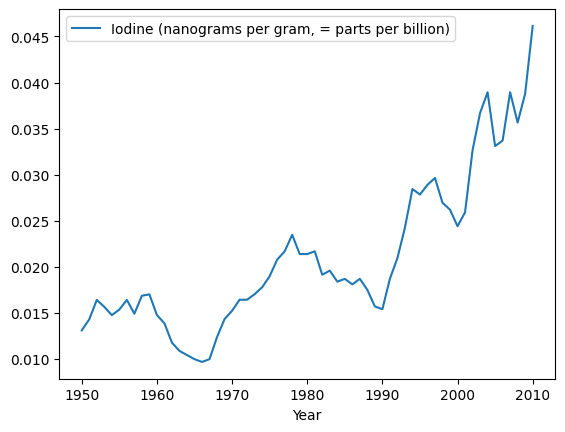

In [3]:
iotimedf.plot(x="Year",y="Iodine (nanograms per gram, = parts per billion)")

In [6]:
# Iodine vs ozone levels
iodf = pd.read_csv("iodine vs ozone.csv")
iodf

,MMDD,Date,O3_iodine/ppbv,O3_iodine_stdv/ppbv,O3_no_iodine/ppbv,O3_no_iodine_stdv/ppbv,O3_diff/%
0,101,1/1/1999,598.37,133.73,636.55,137.25,-6.00
1,102,2/1/1999,604.38,109.26,642.29,138.70,-5.90
2,103,3/1/1999,602.69,105.95,639.22,130.19,-5.71
3,104,4/1/1999,611.59,109.92,649.20,127.78,-5.79
4,105,5/1/1999,609.50,114.75,647.57,122.23,-5.88
...,...,...,...,...,...,...,...
360,1227,27/12/1999,578.94,139.92,616.95,143.98,-6.16
361,1228,28/12/1999,581.12,136.15,619.17,140.15,-6.15
362,1229,29/12/1999,583.40,132.48,621.52,136.40,-6.13
363,1230,30/12/1999,586.25,129.66,624.37,133.55,-6.10


In [44]:
iodf

,MMDD,Date,O3_iodine/ppbv,O3_iodine_stdv/ppbv,O3_no_iodine/ppbv,O3_no_iodine_stdv/ppbv,O3_diff/%,dt
0,101,1/1/1999,598.37,133.73,636.55,137.25,-6.00,1999-01-01
1,102,2/1/1999,604.38,109.26,642.29,138.70,-5.90,1999-01-02
2,103,3/1/1999,602.69,105.95,639.22,130.19,-5.71,1999-01-03
3,104,4/1/1999,611.59,109.92,649.20,127.78,-5.79,1999-01-04
4,105,5/1/1999,609.50,114.75,647.57,122.23,-5.88,1999-01-05
...,...,...,...,...,...,...,...,...
360,1227,27/12/1999,578.94,139.92,616.95,143.98,-6.16,1999-12-27
361,1228,28/12/1999,581.12,136.15,619.17,140.15,-6.15,1999-12-28
362,1229,29/12/1999,583.40,132.48,621.52,136.40,-6.13,1999-12-29
363,1230,30/12/1999,586.25,129.66,624.37,133.55,-6.10,1999-12-30


In [7]:
from plotly_calplot import calplot

iodf['dt'] = pd.to_datetime(iodf.Date, format="%d/%m/%Y")
mname={
1:"Jan",
2:"Feb",
3:"Mar",
4:"Apr",
5:"May",
6:"Jun",
7:"Jul",
8:"Aug",
9:"Sep",
10:"Oct",
11:"Nov",
12:"Dec"
}

# creating the plot without iodine
fig = calplot(
         iodf,
         x="dt",
         y="O3_no_iodine/ppbv",
         gap=1,
        #  colorscale=["#FFAE62", "#FCF8F3"], # dark to light
         colorscale=[(0,"#F8D6B7"),(0.3,"#F8D6B7"), (1,"#E9872B")], # light to dark
        month_lines_width=0,
        # month_lines_width=1,
        #  month_lines_color="#f2f2f2"
        # text="O3_iodine/ppbv",
        # dark_theme=True
)

iodf['datetext'] = [x.strftime('%d')+" "+mname[int(x.strftime('%m'))] for x in iodf['dt']]
iodf['customdata'] = iodf['datetext'] + ": " + iodf['O3_no_iodine/ppbv'].astype(str)
fig.update_traces(
    customdata=iodf['customdata'],
    hovertemplate='%{customdata} <extra></extra>'
    # marker=dict(
    #         # color='LightSkyBlue',
    #         # size=20,
    #         # line=dict(
    #         #     color='MediumPurple',
    #         #     width=2
    #         # )
    #     ),
)


fig.update_layout(
    plot_bgcolor="#212121",
    paper_bgcolor="#212121",
    hoverlabel=dict(
        bgcolor="#f2f2f2",
        bordercolor="#f2f2f2",
        font_color="#212121",
    ),
    xaxis={
            "ticktext": list(mname.values()),
            # "tickangle": -90,
            'fixedrange':True
        },
    yaxis={'visible': False,
         'showticklabels': False,
         'fixedrange':True},
    margin=dict(l=0, r=0, t=0, b=0),
    font_size=12,
    font_color="#f2f2f2",
    width=600,
    # font_family="Source Sans Pro",
)
# max_no_iodine = iodf['O3_no_iodine/ppbv'].max().astype(float)
# print(max_no_iodine)
# for x,y,z,a1,a2,a3,a4,a5 in iodf.itertuples(index=False):
#     # print(x,y,z,a1)
#     # break
#     if a1>=max_no_iodine:  
#         print(x,y,z,a1)              
#         fig.add_annotation(
#                 x=a1, 
#                 y=y,
#                 text=x,
#                 showarrow=False,
#                 yshift=-25,
#                 font_color="#2B3F5E",
#             )


# fig.add_annotation(x=iodf.dt.get(0), y=iodf['O3_no_iodine/ppbv'],
#             text="Text annotation with arrow",
#             showarrow=True,
#             arrowhead=1,
#             font_color="red",
#             arrowcolor="red",)
fig.show(config={'displayModeBar': False, 'responsive': True})

fig.write_html("../../../../tejalwakchoure.github.io/_includes/heatmap_no_iodine.html", 
               config={'displayModeBar': False, 'responsive': True},
               include_plotlyjs=False, full_html=False)


In [117]:

# creating the plot with iodine
fig = calplot(
         iodf,
         x="dt",
         y="O3_iodine/ppbv",
         gap=1,
        # colorscale=["#F47600", "#FFF9F0"], # dark to light
        colorscale=[(0,"#FFFFFF"),(0.3,"#FFFFFF"), (1,"#F0A55F")], # light to dark
        month_lines_width=0,
        # showscale=True
        # month_lines_width=1,
        #  month_lines_color="#f2f2f2"
)
iodf['datetext'] = [x.strftime('%d')+" "+mname[int(x.strftime('%m'))] for x in iodf['dt']]
iodf['customdata'] = iodf['datetext'] + ": " + iodf['O3_iodine/ppbv'].astype(str)
fig.update_traces(
    customdata=iodf['customdata'],
    hovertemplate='%{customdata} <extra></extra>'
)

fig.update_layout(
    plot_bgcolor="#212121",
    paper_bgcolor="#212121",
    hoverlabel=dict(
        bgcolor="#f2f2f2",
        bordercolor="#f2f2f2",
        font_color="#212121",
    ),
       xaxis={
            "ticktext": list(mname.values()),
            # "tickangle": -90,
            'fixedrange':True
        },
    yaxis={'visible': False,
         'showticklabels': False,
         'fixedrange':True},
    margin=dict(l=0, r=0, t=0, b=0),
    font_size=12,
    font_color="#f2f2f2",
    width=600,
    # font_family="Source Sans Pro",
)

# for x,y,z,a in scatterdf.itertuples(index=False):
#     if a>60:                   
#         fig.add_annotation(
#                 x=a, 
#                 y=y,
#                 text=x,
#                 showarrow=False,
#                 yshift=-25,
#                 font_color="#2B3F5E",
#             )

fig.show(config={'displayModeBar': False})
fig.write_html("../../../../tejalwakchoure.github.io/_includes/heatmap_with_iodine.html", 
               config={'displayModeBar': False, 'responsive': True},
               include_plotlyjs=False, full_html=False)


In [11]:
# creating the plot without iodine for med devices
fig = calplot(
         iodf,
         x="dt",
         y="O3_no_iodine/ppbv",
         gap=1,
        #  colorscale=["#FFAE62", "#FCF8F3"], # dark to light
         colorscale=[(0,"#F8D6B7"),(0.3,"#F8D6B7"), (1,"#E9872B")], # light to dark
        month_lines_width=0,
)

iodf['datetext'] = [x.strftime('%d')+" "+mname[int(x.strftime('%m'))] for x in iodf['dt']]
iodf['customdata'] = iodf['datetext'] + ": " + iodf['O3_no_iodine/ppbv'].astype(str)
fig.update_traces(
    customdata=iodf['customdata'],
    hovertemplate='%{customdata} <extra></extra>'
)


fig.update_layout(
    plot_bgcolor="#212121",
    paper_bgcolor="#212121",
    hoverlabel=dict(
        bgcolor="#f2f2f2",
        bordercolor="#f2f2f2",
        font_color="#212121",
    ),
    xaxis={
            "ticktext": list(mname.values()),
            # "tickangle": -90,
            'fixedrange':True
        },
    yaxis={'visible': False,
         'showticklabels': False,
         'fixedrange':True},
    margin=dict(l=0, r=0, t=0, b=0),
    font_size=12,
    font_color="#f2f2f2",
    width=500,
)

fig.show(config={'displayModeBar': False, 'responsive': True})

fig.write_html("../../../../tejalwakchoure.github.io/_includes/heatmap_no_iodine_med_device.html", 
               config={'displayModeBar': False, 'responsive': True},
               include_plotlyjs=False, full_html=False)

In [13]:
# creating the plot with iodine for med devices
fig = calplot(
         iodf,
         x="dt",
         y="O3_iodine/ppbv",
         gap=1,
        # colorscale=["#F47600", "#FFF9F0"], # dark to light
        colorscale=[(0,"#FFFFFF"),(0.3,"#FFFFFF"), (1,"#F0A55F")], # light to dark
        month_lines_width=0,
)

iodf['datetext'] = [x.strftime('%d')+" "+mname[int(x.strftime('%m'))] for x in iodf['dt']]
iodf['customdata'] = iodf['datetext'] + ": " + iodf['O3_iodine/ppbv'].astype(str)
fig.update_traces(
    customdata=iodf['customdata'],
    hovertemplate='%{customdata} <extra></extra>'
)


fig.update_layout(
    plot_bgcolor="#212121",
    paper_bgcolor="#212121",
    hoverlabel=dict(
        bgcolor="#f2f2f2",
        bordercolor="#f2f2f2",
        font_color="#212121",
    ),
    xaxis={
            "ticktext": list(mname.values()),
            # "tickangle": -90,
            'fixedrange':True
        },
    yaxis={'visible': False,
         'showticklabels': False,
         'fixedrange':True},
    margin=dict(l=0, r=0, t=0, b=0),
    font_size=12,
    font_color="#f2f2f2",
    width=500,
)

fig.show(config={'displayModeBar': False, 'responsive': True})

fig.write_html("../../../../tejalwakchoure.github.io/_includes/heatmap_with_iodine_med_device.html", 
               config={'displayModeBar': False, 'responsive': True},
               include_plotlyjs=False, full_html=False)

In [122]:
from plotly_calplot import calplot

# creating the plot without iodine, for mobile
fig = calplot(
         iodf,
         x="dt",
         y="O3_no_iodine/ppbv",
         gap=1,
        #  colorscale=["#FFAE62", "#FCF8F3"], # dark to light
         colorscale=[(0,"#F8D6B7"),(0.3,"#F8D6B7"), (1,"#E9872B")], # light to dark
        month_lines_width=0,
        # month_lines_width=1,
        #  month_lines_color="#f2f2f2"
        # text="O3_iodine/ppbv",
        # dark_theme=True
)

iodf['datetext'] = [x.strftime('%d')+" "+mname[int(x.strftime('%m'))] for x in iodf['dt']]
iodf['customdata'] = iodf['datetext'] + ": " + iodf['O3_no_iodine/ppbv'].astype(str)
fig.update_traces(
    customdata=iodf['customdata'],
    hovertemplate='%{customdata} <extra></extra>'
    # marker=dict(
    #         # color='LightSkyBlue',
    #         # size=20,
    #         # line=dict(
    #         #     color='MediumPurple',
    #         #     width=2
    #         # )
    #     ),
)


fig.update_layout(
    plot_bgcolor="#212121",
    paper_bgcolor="#212121",
    hoverlabel=dict(
        bgcolor="#f2f2f2",
        bordercolor="#f2f2f2",
        font_color="#212121",
    ),
    xaxis={
            "ticktext": list(mname.values()),
            # "tickangle": -90,
            'fixedrange':True
        },
    yaxis={'visible': False,
         'showticklabels': False,
         'fixedrange':True},
    margin=dict(l=0, r=0, t=0, b=0),
    font_size=12,
    font_color="#f2f2f2",
    width=300,
    # font_family="Source Sans Pro",
)
# max_no_iodine = iodf['O3_no_iodine/ppbv'].max().astype(float)
# print(max_no_iodine)
# for x,y,z,a1,a2,a3,a4,a5 in iodf.itertuples(index=False):
#     # print(x,y,z,a1)
#     # break
#     if a1>=max_no_iodine:  
#         print(x,y,z,a1)              
#         fig.add_annotation(
#                 x=a1, 
#                 y=y,
#                 text=x,
#                 showarrow=False,
#                 yshift=-25,
#                 font_color="#2B3F5E",
#             )


# fig.add_annotation(x=iodf.dt.get(0), y=iodf['O3_no_iodine/ppbv'],
#             text="Text annotation with arrow",
#             showarrow=True,
#             arrowhead=1,
#             font_color="red",
#             arrowcolor="red",)
fig.show(config={'displayModeBar': False, 'responsive': True})

fig.write_html("../../../../tejalwakchoure.github.io/_includes/heatmap_no_iodine_small_device.html", 
               config={'displayModeBar': False, 'responsive': True},
               include_plotlyjs=False, full_html=False)


In [4]:

# creating the plot with iodine, for mobile
fig = calplot(
         iodf,
         x="dt",
         y="O3_iodine/ppbv",
         gap=1,
        # colorscale=["#F47600", "#FFF9F0"], # dark to light
        colorscale=[(0,"#FFFFFF"),(0.3,"#FFFFFF"), (1,"#F0A55F")], # light to dark
        month_lines_width=0,
        # showscale=True
        # month_lines_width=1,
        #  month_lines_color="#f2f2f2"
)
iodf['datetext'] = [x.strftime('%d')+" "+mname[int(x.strftime('%m'))] for x in iodf['dt']]
iodf['customdata'] = iodf['datetext'] + ": " + iodf['O3_iodine/ppbv'].astype(str)
fig.update_traces(
    customdata=iodf['customdata'],
    hovertemplate='%{customdata} <extra></extra>'
)

fig.update_layout(
    plot_bgcolor="#212121",
    paper_bgcolor="#212121",
    hoverlabel=dict(
        bgcolor="#f2f2f2",
        bordercolor="#f2f2f2",
        font_color="#212121",
    ),
       xaxis={
            "ticktext": list(mname.values()),
            # "tickangle": -90,
            'fixedrange':True
        },
    yaxis={'visible': False,
         'showticklabels': False,
         'fixedrange':True},
    margin=dict(l=0, r=0, t=0, b=0),
    font_size=12,
    font_color="#f2f2f2",
    minwidth=300,
    # font_family="Source Sans Pro",
)

# for x,y,z,a in scatterdf.itertuples(index=False):
#     if a>60:                   
#         fig.add_annotation(
#                 x=a, 
#                 y=y,
#                 text=x,
#                 showarrow=False,
#                 yshift=-25,
#                 font_color="#2B3F5E",
#             )

fig.show(config={'displayModeBar': False})
# fig.write_html("../../../../tejalwakchoure.github.io/_includes/heatmap_with_iodine_small_device.html", 
#                config={'displayModeBar': False, 'responsive': True},
#                include_plotlyjs=False, full_html=False)


NameError: name 'calplot' is not defined